# **AirFly Insights: Data Visualization and Analysis of Airline Operations** 

## **Milestone 1: Data Foundation and Cleaning**

#### **Week 1: Project Initialization and Dataset Setup**

• Define goals, KPIs, and workflow <br>
• Load CSVs using pandas <br>
• Explore schema, types, size, and nulls <br>
• Perform sampling and memory optimizations

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
flights_sample_file_path = r"D:\AirFly_Insights\data\raw data\flights_sample_3m.csv"
df = pd.read_csv(flights_sample_file_path)                             
df.head() 

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [42]:
df.shape

(3000000, 32)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [44]:
df.nunique()

FL_DATE                    1704
AIRLINE                      18
AIRLINE_DOT                  18
AIRLINE_CODE                 18
DOT_CODE                     18
FL_NUMBER                  7111
ORIGIN                      380
ORIGIN_CITY                 373
DEST                        380
DEST_CITY                   373
CRS_DEP_TIME               1384
DEP_TIME                   1440
DEP_DELAY                  1513
TAXI_OUT                    179
WHEELS_OFF                 1440
WHEELS_ON                  1440
TAXI_IN                     202
CRS_ARR_TIME               1435
ARR_TIME                   1440
ARR_DELAY                  1527
CANCELLED                     2
CANCELLATION_CODE             4
DIVERTED                      2
CRS_ELAPSED_TIME            640
ELAPSED_TIME                696
AIR_TIME                    666
DISTANCE                   1727
DELAY_DUE_CARRIER          1291
DELAY_DUE_WEATHER           812
DELAY_DUE_NAS               671
DELAY_DUE_SECURITY          172
DELAY_DU

In [45]:
# sort the date column
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df = df.sort_values(by='FL_DATE').reset_index(drop=True)

In [46]:
# start and end dates of dataset
start_date = df['FL_DATE'].min()
end_date = df['FL_DATE'].max()

print("Start Date:", start_date)
print("Last Date :", end_date)

Start Date: 2019-01-01 00:00:00
Last Date : 2023-08-31 00:00:00


In [47]:
year_ranges = df.groupby(df['FL_DATE'].dt.year)['FL_DATE'].agg(['min', 'max']).reset_index()

year_ranges

,FL_DATE,min,max
0,2019,2019-01-01,2019-12-31
1,2020,2020-01-01,2020-12-31
2,2021,2021-01-01,2021-12-31
3,2022,2022-01-01,2022-12-31
4,2023,2023-01-01,2023-08-31


In [48]:
start_date = "01-01-2020"
end_date = "31-12-2021"

cropped_df = df[(df["FL_DATE"] >= start_date) & (df["FL_DATE"] <= end_date)]

In [49]:
cropped_df.shape

(1090983, 32)

In [50]:
cropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090983 entries, 757673 to 1848655
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   FL_DATE                  1090983 non-null  datetime64[ns]
 1   AIRLINE                  1090983 non-null  object        
 2   AIRLINE_DOT              1090983 non-null  object        
 3   AIRLINE_CODE             1090983 non-null  object        
 4   DOT_CODE                 1090983 non-null  int64         
 5   FL_NUMBER                1090983 non-null  int64         
 6   ORIGIN                   1090983 non-null  object        
 7   ORIGIN_CITY              1090983 non-null  object        
 8   DEST                     1090983 non-null  object        
 9   DEST_CITY                1090983 non-null  object        
 10  CRS_DEP_TIME             1090983 non-null  int64         
 11  DEP_TIME                 1052061 non-null  float64       
 12  

In [51]:
cropped_df = cropped_df.copy()

# Convert object to category
cat_cols = ["AIRLINE", "AIRLINE_DOT", "AIRLINE_CODE", 
            "ORIGIN", "ORIGIN_CITY", "DEST", "DEST_CITY", 
            "CANCELLATION_CODE"]
for col in cat_cols:
    cropped_df[col] = cropped_df[col].astype("category")

# Convert int64 -> smaller ints
cropped_df["DOT_CODE"] = cropped_df["DOT_CODE"].astype("int16")
cropped_df["FL_NUMBER"] = cropped_df["FL_NUMBER"].astype("int16")
cropped_df["CRS_DEP_TIME"] = cropped_df["CRS_DEP_TIME"].astype("int16")
cropped_df["CRS_ARR_TIME"] = cropped_df["CRS_ARR_TIME"].astype("int16")
cropped_df["DISTANCE"] = cropped_df["DISTANCE"].astype("int16")

# Convert flags to bool
cropped_df["CANCELLED"] = cropped_df["CANCELLED"].astype("bool")
cropped_df["DIVERTED"] = cropped_df["DIVERTED"].astype("bool")

# Convert float64 -> float32
float_cols = ["DEP_TIME", "DEP_DELAY", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON",
              "TAXI_IN", "ARR_TIME", "ARR_DELAY", "CRS_ELAPSED_TIME",
              "ELAPSED_TIME", "AIR_TIME", "DELAY_DUE_CARRIER",
              "DELAY_DUE_WEATHER", "DELAY_DUE_NAS", 
              "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]

for col in float_cols:
    cropped_df[col] = cropped_df[col].astype("float32")


print(cropped_df.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
Index: 1090983 entries, 757673 to 1848655
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   FL_DATE                  1090983 non-null  datetime64[ns]
 1   AIRLINE                  1090983 non-null  category      
 2   AIRLINE_DOT              1090983 non-null  category      
 3   AIRLINE_CODE             1090983 non-null  category      
 4   DOT_CODE                 1090983 non-null  int16         
 5   FL_NUMBER                1090983 non-null  int16         
 6   ORIGIN                   1090983 non-null  category      
 7   ORIGIN_CITY              1090983 non-null  category      
 8   DEST                     1090983 non-null  category      
 9   DEST_CITY                1090983 non-null  category      
 10  CRS_DEP_TIME             1090983 non-null  int16         
 11  DEP_TIME                 1052061 non-null  float32       
 12  

#### **Week 2: Preprocessing and Feature Engineering**

• Handle nulls in delay and cancellation columns <br>
• Create derived features: Month, Day of Week, Hour, Route <br>
• Format datetime columns <br>
• Save preprocessed data for fast reuse <br>

In [52]:
# Copy dataset to avoid warnings
cropped_df = cropped_df.copy()

delay_cols = [
    "DELAY_DUE_CARRIER",
    "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]

# Create TOTAL_DELAY as row-wise sum of delay columns
cropped_df["TOTAL_DELAY"] = cropped_df[delay_cols].sum(
    axis=1,
    skipna=False,  # NaN stays NaN if all values are NaN
    min_count=1    # require at least 1 non-NaN to compute
)

# Melt into long format (useful if you want Delay_Type vs Delay_Minutes)
df_long = cropped_df.melt(
    id_vars=[col for col in cropped_df.columns if col not in delay_cols], 
    value_vars=delay_cols,
    var_name="Delay_Type",
    value_name="Delay_Minutes"
)

In [53]:
df_long

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TOTAL_DELAY,Delay_Type,Delay_Minutes
0,2020-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,5162,PHX,"Phoenix, AZ",ONT,"Ontario, CA",...,False,NaN,False,75.0,75.0,52.0,325,NaN,DELAY_DUE_CARRIER,NaN
1,2020-01-01,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3380,PDX,"Portland, OR",ABQ,"Albuquerque, NM",...,False,NaN,False,163.0,139.0,124.0,1111,NaN,DELAY_DUE_CARRIER,NaN
2,2020-01-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3239,CLT,"Charlotte, NC",HOU,"Houston, TX",...,False,NaN,False,180.0,177.0,151.0,920,18.0,DELAY_DUE_CARRIER,9.0
3,2020-01-01,Republic Airline,Republic Airline: YX,YX,20452,3588,ATL,"Atlanta, GA",DEN,"Denver, CO",...,False,NaN,False,213.0,210.0,188.0,1199,NaN,DELAY_DUE_CARRIER,NaN
4,2020-01-01,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4265,MSP,"Minneapolis, MN",BRD,"Brainerd, MN",...,False,NaN,False,74.0,52.0,29.0,114,NaN,DELAY_DUE_CARRIER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454910,2021-12-31,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.: HA,HA,19690,342,HNL,"Honolulu, HI",ITO,"Hilo, HI",...,False,NaN,False,57.0,54.0,36.0,216,30.0,DELAY_DUE_LATE_AIRCRAFT,8.0
5454911,2021-12-31,Frontier Airlines Inc.,Frontier Airlines Inc.: F9,F9,20436,1118,MCO,"Orlando, FL",MDT,"Harrisburg, PA",...,False,NaN,False,149.0,137.0,115.0,851,15.0,DELAY_DUE_LATE_AIRCRAFT,0.0
5454912,2021-12-31,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,360,DFW,"Dallas/Fort Worth, TX",LAS,"Las Vegas, NV",...,False,NaN,False,180.0,193.0,154.0,1055,29.0,DELAY_DUE_LATE_AIRCRAFT,0.0
5454913,2021-12-31,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1388,SEA,"Seattle, WA",GEG,"Spokane, WA",...,False,NaN,False,72.0,68.0,38.0,224,28.0,DELAY_DUE_LATE_AIRCRAFT,0.0


In [54]:
drop_cols = [
    "AIRLINE_DOT",        
    "AIRLINE_CODE",       
    "DOT_CODE",           
    "FL_NUMBER",
    "ORIGIN",
    "DEST",
    "WHEELS_OFF",        
    "WHEELS_ON",                
]

df_cleaned = df_long.drop(columns=drop_cols)

In [55]:
df_cleaned

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TOTAL_DELAY,Delay_Type,Delay_Minutes
0,2020-01-01,Southwest Airlines Co.,"Phoenix, AZ","Ontario, CA",830,830.0,0.0,19.0,4.0,845,...,False,NaN,False,75.0,75.0,52.0,325,NaN,DELAY_DUE_CARRIER,NaN
1,2020-01-01,SkyWest Airlines Inc.,"Portland, OR","Albuquerque, NM",855,848.0,-7.0,10.0,5.0,1238,...,False,NaN,False,163.0,139.0,124.0,1111,NaN,DELAY_DUE_CARRIER,NaN
2,2020-01-01,Southwest Airlines Co.,"Charlotte, NC","Houston, TX",1800,1821.0,21.0,17.0,9.0,2000,...,False,NaN,False,180.0,177.0,151.0,920,18.0,DELAY_DUE_CARRIER,9.0
3,2020-01-01,Republic Airline,"Atlanta, GA","Denver, CO",2002,1958.0,-4.0,15.0,7.0,2135,...,False,NaN,False,213.0,210.0,188.0,1199,NaN,DELAY_DUE_CARRIER,NaN
4,2020-01-01,SkyWest Airlines Inc.,"Minneapolis, MN","Brainerd, MN",1958,1949.0,-9.0,19.0,4.0,2112,...,False,NaN,False,74.0,52.0,29.0,114,NaN,DELAY_DUE_CARRIER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454910,2021-12-31,Hawaiian Airlines Inc.,"Honolulu, HI","Hilo, HI",1445,1518.0,33.0,13.0,5.0,1542,...,False,NaN,False,57.0,54.0,36.0,216,30.0,DELAY_DUE_LATE_AIRCRAFT,8.0
5454911,2021-12-31,Frontier Airlines Inc.,"Orlando, FL","Harrisburg, PA",1402,1429.0,27.0,17.0,5.0,1631,...,False,NaN,False,149.0,137.0,115.0,851,15.0,DELAY_DUE_LATE_AIRCRAFT,0.0
5454912,2021-12-31,Spirit Air Lines,"Dallas/Fort Worth, TX","Las Vegas, NV",2250,2306.0,16.0,16.0,23.0,2350,...,False,NaN,False,180.0,193.0,154.0,1055,29.0,DELAY_DUE_LATE_AIRCRAFT,0.0
5454913,2021-12-31,Delta Air Lines Inc.,"Seattle, WA","Spokane, WA",1116,1148.0,32.0,25.0,5.0,1228,...,False,NaN,False,72.0,68.0,38.0,224,28.0,DELAY_DUE_LATE_AIRCRAFT,0.0


In [56]:
df_cleaned.isnull().sum()

FL_DATE                    0
AIRLINE                    0
ORIGIN_CITY                0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME              194610
DEP_DELAY             194705
TAXI_OUT              195935
TAXI_IN               197530
CRS_ARR_TIME               0
ARR_TIME              197525
ARR_DELAY             207255
CANCELLED                  0
CANCELLATION_CODE    5258470
DIVERTED                   0
CRS_ELAPSED_TIME           5
ELAPSED_TIME          207255
AIR_TIME              207255
DISTANCE                   0
TOTAL_DELAY          4717500
Delay_Type                 0
Delay_Minutes        4717500
dtype: int64

In [57]:
# Copy dataset to avoid warnings
df_cleaned = df_cleaned.copy()

# Fill NaNs in delay-related columns with 0
delay_cols = ["DEP_DELAY", "ARR_DELAY", "TAXI_OUT", "TAXI_IN"]  # removed TOTAL_DELAY (unless you created it)
df_cleaned[delay_cols] = df_cleaned[delay_cols].fillna(0)

# Handle cancellations
df_cleaned["CANCELLED"] = df_cleaned["CANCELLED"].fillna(0)

# If cancellation code is categorical, add "None" as category before filling
if str(df_cleaned["CANCELLATION_CODE"].dtype) == "category":
    df_cleaned["CANCELLATION_CODE"] = df_cleaned["CANCELLATION_CODE"].cat.add_categories("None")
    df_cleaned["CANCELLATION_CODE"] = df_cleaned["CANCELLATION_CODE"].fillna("None")
else:
    df_cleaned["CANCELLATION_CODE"] = df_cleaned["CANCELLATION_CODE"].fillna("None").astype("category")


# Handle diverted column
df_cleaned["DIVERTED"] = df_cleaned["DIVERTED"].fillna(0)

# Handle Delay_Type column (fill missing with 'No Delay' and convert to category)
df_cleaned["Delay_Type"] = df_cleaned["Delay_Type"].fillna("No Delay").astype("category")


In [58]:
df_cleaned.isnull().sum()

FL_DATE                    0
AIRLINE                    0
ORIGIN_CITY                0
DEST_CITY                  0
CRS_DEP_TIME               0
DEP_TIME              194610
DEP_DELAY                  0
TAXI_OUT                   0
TAXI_IN                    0
CRS_ARR_TIME               0
ARR_TIME              197525
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
DIVERTED                   0
CRS_ELAPSED_TIME           5
ELAPSED_TIME          207255
AIR_TIME              207255
DISTANCE                   0
TOTAL_DELAY          4717500
Delay_Type                 0
Delay_Minutes        4717500
dtype: int64

In [59]:
# Convert FL_DATE to datetime
df_cleaned["FL_DATE"] = pd.to_datetime(df_cleaned["FL_DATE"], errors="coerce")

# Month (1–12)
df_cleaned["Month"] = df_cleaned["FL_DATE"].dt.month

df_cleaned["Year"] = df_cleaned["FL_DATE"].dt.year

# Day of Week (Monday=0 … Sunday=6)
df_cleaned["DayOfWeek"] = df_cleaned["FL_DATE"].dt.dayofweek

# Hour from CRS_DEP_TIME
# CRS_DEP_TIME is usually in "hhmm" format (e.g., 1345 = 13:45)
df_cleaned["CRS_DEP_TIME"] = df_cleaned["CRS_DEP_TIME"].astype(str).str.zfill(4)  # ensure 4 digits
df_cleaned["DepHour"] = df_cleaned["CRS_DEP_TIME"].str[:2].astype(int)  # take first 2 digits as hour

# Route (Origin → Destination)
df_cleaned["Route"] = df_cleaned["ORIGIN_CITY"].astype(str) + "_" + df_cleaned["DEST_CITY"].astype(str)

In [60]:
df_cleaned

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,...,AIR_TIME,DISTANCE,TOTAL_DELAY,Delay_Type,Delay_Minutes,Month,Year,DayOfWeek,DepHour,Route
0,2020-01-01,Southwest Airlines Co.,"Phoenix, AZ","Ontario, CA",0830,830.0,0.0,19.0,4.0,845,...,52.0,325,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,8,"Phoenix, AZ_Ontario, CA"
1,2020-01-01,SkyWest Airlines Inc.,"Portland, OR","Albuquerque, NM",0855,848.0,-7.0,10.0,5.0,1238,...,124.0,1111,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,8,"Portland, OR_Albuquerque, NM"
2,2020-01-01,Southwest Airlines Co.,"Charlotte, NC","Houston, TX",1800,1821.0,21.0,17.0,9.0,2000,...,151.0,920,18.0,DELAY_DUE_CARRIER,9.0,1,2020,2,18,"Charlotte, NC_Houston, TX"
3,2020-01-01,Republic Airline,"Atlanta, GA","Denver, CO",2002,1958.0,-4.0,15.0,7.0,2135,...,188.0,1199,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,20,"Atlanta, GA_Denver, CO"
4,2020-01-01,SkyWest Airlines Inc.,"Minneapolis, MN","Brainerd, MN",1958,1949.0,-9.0,19.0,4.0,2112,...,29.0,114,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,19,"Minneapolis, MN_Brainerd, MN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454910,2021-12-31,Hawaiian Airlines Inc.,"Honolulu, HI","Hilo, HI",1445,1518.0,33.0,13.0,5.0,1542,...,36.0,216,30.0,DELAY_DUE_LATE_AIRCRAFT,8.0,12,2021,4,14,"Honolulu, HI_Hilo, HI"
5454911,2021-12-31,Frontier Airlines Inc.,"Orlando, FL","Harrisburg, PA",1402,1429.0,27.0,17.0,5.0,1631,...,115.0,851,15.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,14,"Orlando, FL_Harrisburg, PA"
5454912,2021-12-31,Spirit Air Lines,"Dallas/Fort Worth, TX","Las Vegas, NV",2250,2306.0,16.0,16.0,23.0,2350,...,154.0,1055,29.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,22,"Dallas/Fort Worth, TX_Las Vegas, NV"
5454913,2021-12-31,Delta Air Lines Inc.,"Seattle, WA","Spokane, WA",1116,1148.0,32.0,25.0,5.0,1228,...,38.0,224,28.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,11,"Seattle, WA_Spokane, WA"


In [61]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454915 entries, 0 to 5454914
Data columns (total 27 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            category      
 2   ORIGIN_CITY        category      
 3   DEST_CITY          category      
 4   CRS_DEP_TIME       object        
 5   DEP_TIME           float32       
 6   DEP_DELAY          float32       
 7   TAXI_OUT           float32       
 8   TAXI_IN            float32       
 9   CRS_ARR_TIME       int16         
 10  ARR_TIME           float32       
 11  ARR_DELAY          float32       
 12  CANCELLED          bool          
 13  CANCELLATION_CODE  category      
 14  DIVERTED           bool          
 15  CRS_ELAPSED_TIME   float32       
 16  ELAPSED_TIME       float32       
 17  AIR_TIME           float32       
 18  DISTANCE           int16         
 19  TOTAL_DELAY        float32       
 20  Delay_Type         categ

In [62]:
for year in df_cleaned['FL_DATE'].dt.year.unique():
    print(f"\nYear: {year}")
    
    months = df_cleaned.loc[df_cleaned['FL_DATE'].dt.year == year, 'FL_DATE'].dt.month.unique()
    
    for m in months:
        print(m, end=" ")


Year: 2020
1 2 3 4 5 6 7 8 9 10 11 12 
Year: 2021
1 2 3 4 5 6 7 8 9 10 11 12 

In [63]:
# Convert CRS_DEP_TIME (Scheduled Departure Time) to datetime.time
df_cleaned['CRS_DEP_TIME'] = pd.to_datetime(df_cleaned['CRS_DEP_TIME'].astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.time

# Convert DEP_TIME (Actual Departure Time) to datetime.time
df_cleaned['DEP_TIME'] = pd.to_datetime(df_cleaned['DEP_TIME'].dropna().astype(int).astype(str).str.zfill(4), format='%H%M', errors='coerce')
df_cleaned['DEP_TIME'] = df_cleaned['DEP_TIME'].dt.time

# Convert CRS_ARR_TIME (Scheduled Arrival Time) to datetime.time
df_cleaned['CRS_ARR_TIME'] = pd.to_datetime(df_cleaned['CRS_ARR_TIME'].astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.time

# Convert ARR_TIME (Actual Arrival Time) to datetime.time
df_cleaned['ARR_TIME'] = pd.to_datetime(df_cleaned['ARR_TIME'].dropna().astype(int).astype(str).str.zfill(4), format='%H%M', errors='coerce')
df_cleaned['ARR_TIME'] = df_cleaned['ARR_TIME'].dt.time

In [64]:
df_cleaned

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,...,AIR_TIME,DISTANCE,TOTAL_DELAY,Delay_Type,Delay_Minutes,Month,Year,DayOfWeek,DepHour,Route
0,2020-01-01,Southwest Airlines Co.,"Phoenix, AZ","Ontario, CA",08:30:00,08:30:00,0.0,19.0,4.0,08:45:00,...,52.0,325,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,8,"Phoenix, AZ_Ontario, CA"
1,2020-01-01,SkyWest Airlines Inc.,"Portland, OR","Albuquerque, NM",08:55:00,08:48:00,-7.0,10.0,5.0,12:38:00,...,124.0,1111,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,8,"Portland, OR_Albuquerque, NM"
2,2020-01-01,Southwest Airlines Co.,"Charlotte, NC","Houston, TX",18:00:00,18:21:00,21.0,17.0,9.0,20:00:00,...,151.0,920,18.0,DELAY_DUE_CARRIER,9.0,1,2020,2,18,"Charlotte, NC_Houston, TX"
3,2020-01-01,Republic Airline,"Atlanta, GA","Denver, CO",20:02:00,19:58:00,-4.0,15.0,7.0,21:35:00,...,188.0,1199,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,20,"Atlanta, GA_Denver, CO"
4,2020-01-01,SkyWest Airlines Inc.,"Minneapolis, MN","Brainerd, MN",19:58:00,19:49:00,-9.0,19.0,4.0,21:12:00,...,29.0,114,NaN,DELAY_DUE_CARRIER,NaN,1,2020,2,19,"Minneapolis, MN_Brainerd, MN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454910,2021-12-31,Hawaiian Airlines Inc.,"Honolulu, HI","Hilo, HI",14:45:00,15:18:00,33.0,13.0,5.0,15:42:00,...,36.0,216,30.0,DELAY_DUE_LATE_AIRCRAFT,8.0,12,2021,4,14,"Honolulu, HI_Hilo, HI"
5454911,2021-12-31,Frontier Airlines Inc.,"Orlando, FL","Harrisburg, PA",14:02:00,14:29:00,27.0,17.0,5.0,16:31:00,...,115.0,851,15.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,14,"Orlando, FL_Harrisburg, PA"
5454912,2021-12-31,Spirit Air Lines,"Dallas/Fort Worth, TX","Las Vegas, NV",22:50:00,23:06:00,16.0,16.0,23.0,23:50:00,...,154.0,1055,29.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,22,"Dallas/Fort Worth, TX_Las Vegas, NV"
5454913,2021-12-31,Delta Air Lines Inc.,"Seattle, WA","Spokane, WA",11:16:00,11:48:00,32.0,25.0,5.0,12:28:00,...,38.0,224,28.0,DELAY_DUE_LATE_AIRCRAFT,0.0,12,2021,4,11,"Seattle, WA_Spokane, WA"


In [65]:
df_cleaned.to_csv(r"D:\AirFly_Insights\data\preprocessed_data.csv", index=False)

**Done**

## **Milestone 2: Visual Exploration and Delay Trends**

#### **Week 3: Univariate and Bivariate Visual Analysis**

• Top airlines, routes, and busiest months <br>
• Flight distribution by day, time, and airport <br>
• Plot bar charts, histograms, boxplots, and line plots

In [66]:
df_preprocessed_data = pd.read_csv(r"D:\AirFly_Insights\data\preprocessed_data.csv", parse_dates=["FL_DATE"])

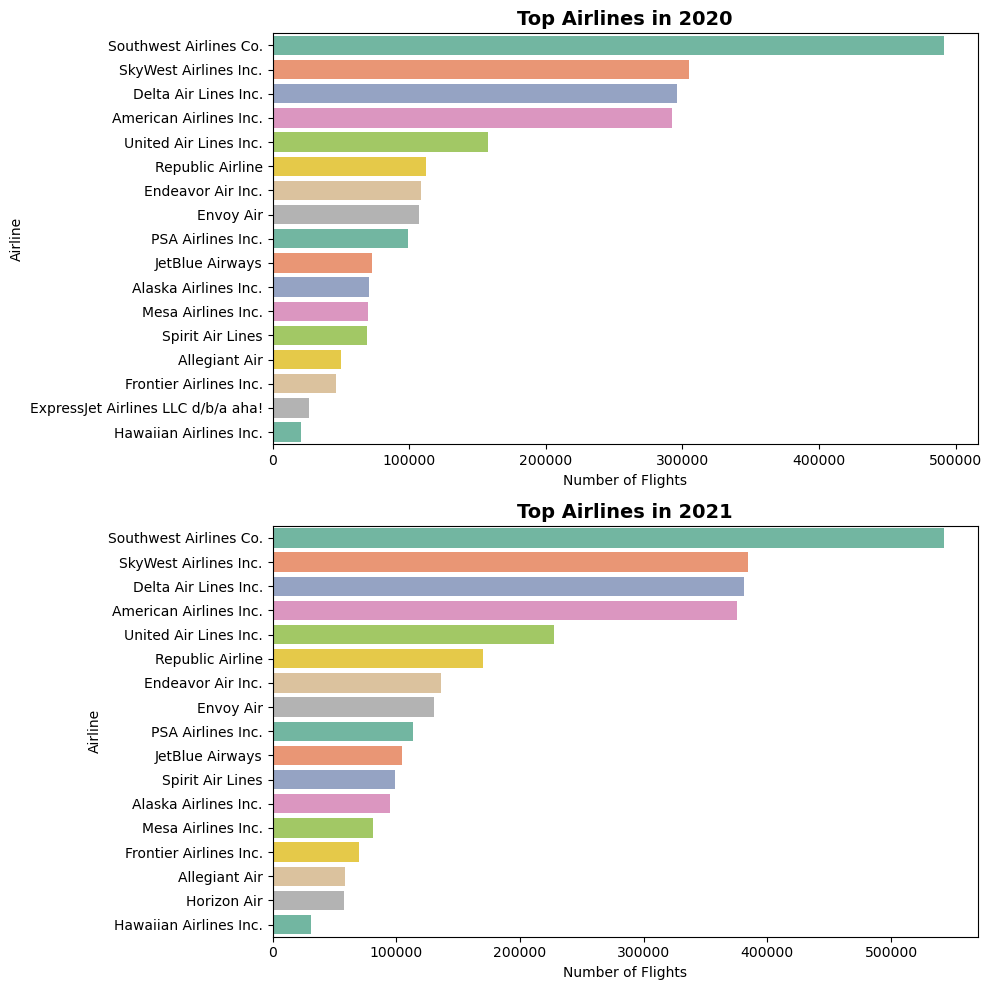

In [67]:
# Top Airlines per Year
top_airlines = (
    df_preprocessed_data.groupby(["Year", "AIRLINE"])
    .size()
    .reset_index(name="Flights")
)

# Sort by flights within each year
top_airlines = top_airlines.sort_values(["Year", "Flights"], ascending=[True, False])

years = sorted(top_airlines["Year"].unique())
fig, axes = plt.subplots(len(years), 1, figsize=(10, 5 * len(years)))

for i, year in enumerate(years):
    subset = top_airlines[top_airlines["Year"] == year]
    sns.barplot(
        data=subset,
        x="Flights",
        y="AIRLINE",
        hue="AIRLINE",   
        dodge=False,
        palette="Set2",
        legend=False,
        ax=axes[i]
    )
    axes[i].set_title(f"Top Airlines in {year}", fontsize=14, weight="bold")
    axes[i].set_xlabel("Number of Flights")
    axes[i].set_ylabel("Airline")

plt.tight_layout()
plt.show()

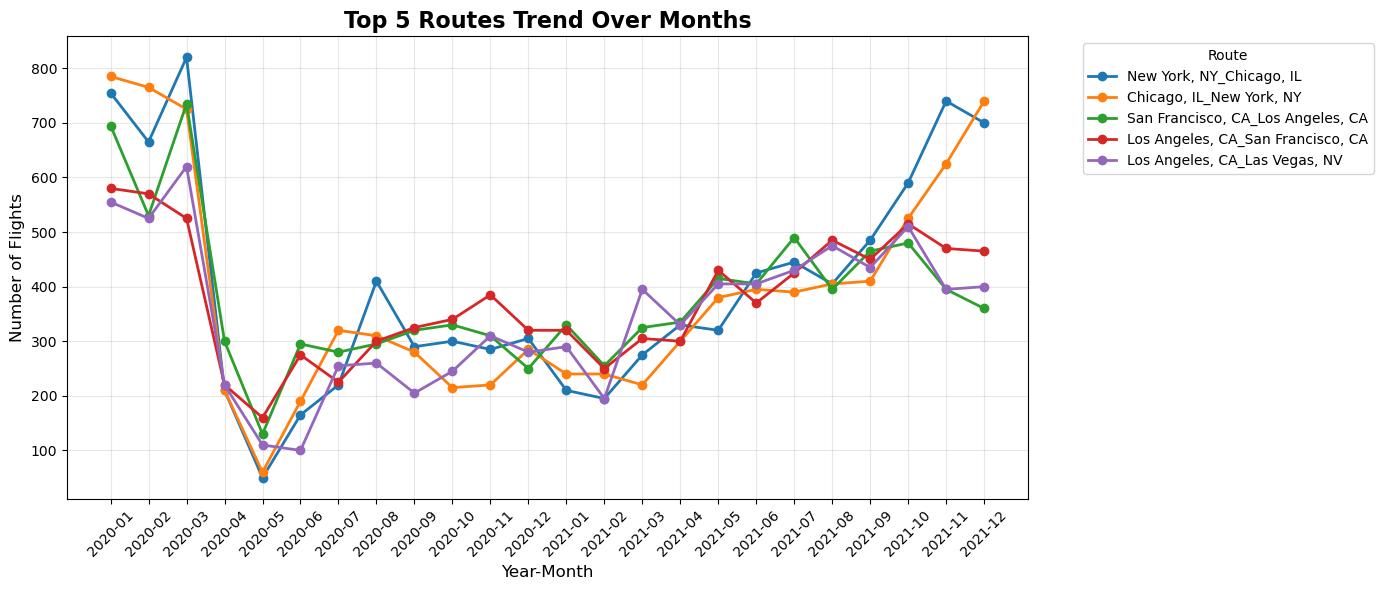

In [68]:
# Top 5 Routes Trend

# Count flights per route per Year-Month
top_routes_monthly = (
    df_preprocessed_data.groupby(["Year", "Month", "Route"])
    .size()
    .reset_index(name="Flights")
)

# Pick top 5 busiest routes overall
top5_routes = (
    top_routes_monthly.groupby("Route")["Flights"].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Create sorted Year-Month labels
top_routes_monthly["YearMonth"] = top_routes_monthly["Year"].astype(str) + "-" + top_routes_monthly["Month"].astype(str).str.zfill(2)
all_yearmonths = sorted(top_routes_monthly["YearMonth"].unique())

# Plot
plt.figure(figsize=(14, 6))
for route in top5_routes:
    subset = top_routes_monthly[top_routes_monthly["Route"] == route].set_index("YearMonth")
    subset = subset.reindex(all_yearmonths, fill_value=0).reset_index()
    plt.plot(subset["YearMonth"], subset["Flights"], marker="o", linewidth=2, label=route)

# Styling
plt.title("Top 5 Routes Trend Over Months", fontsize=16, weight="bold")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="Route", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


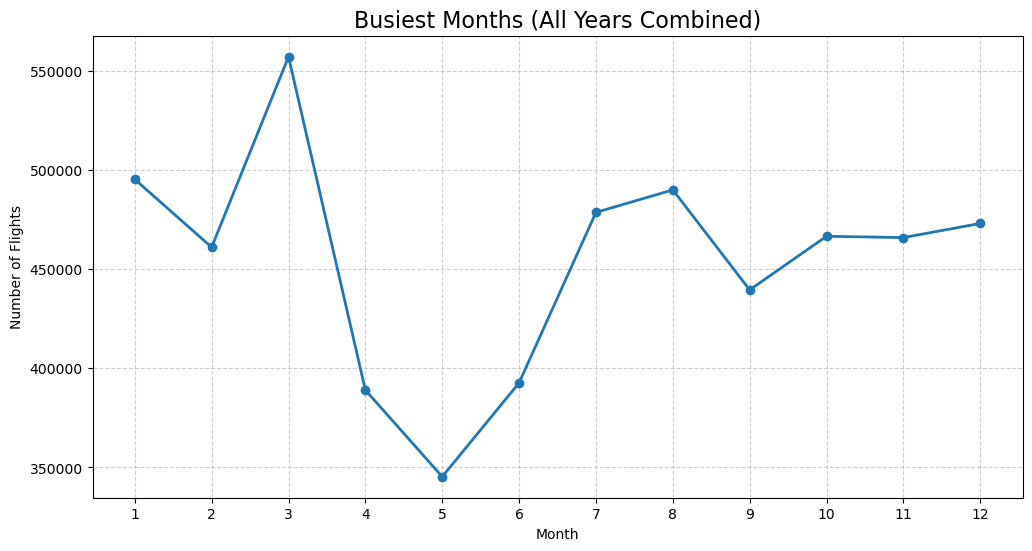

In [69]:
# Busiest Months

# Group by Month (across all years)
monthly_flights = df_preprocessed_data.groupby("Month").size().reset_index(name="Flights")

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_flights["Month"], monthly_flights["Flights"], marker="o", linewidth=2)
plt.title("Busiest Months (All Years Combined)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(1,13))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


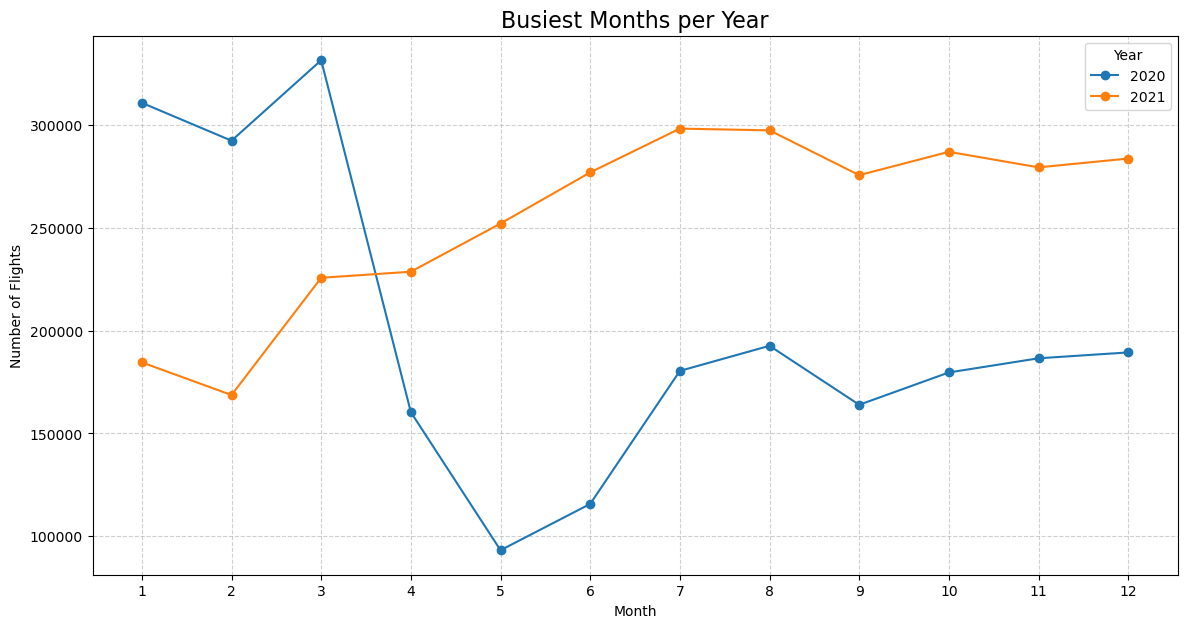

In [70]:
# Group by Year + Month
monthly_flights_year = (
    df_preprocessed_data.groupby(["Year", "Month"])
    .size()
    .reset_index(name="Flights")
)

# Plot
plt.figure(figsize=(14,7))
for year in sorted(monthly_flights_year["Year"].unique()):
    year_data = monthly_flights_year[monthly_flights_year["Year"] == year]
    plt.plot(year_data["Month"], year_data["Flights"], marker="o", label=year)

plt.title("Busiest Months per Year", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

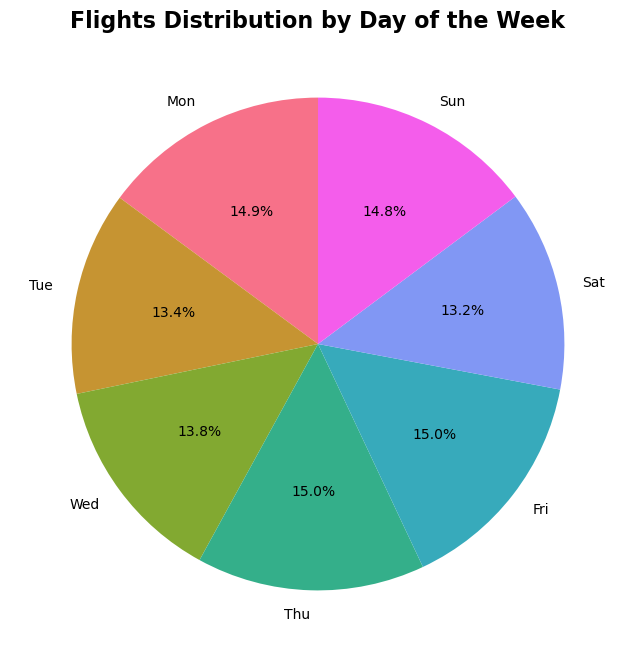

In [71]:
# Group flights by DayOfWeek
day_flights = df_preprocessed_data.groupby("DayOfWeek").size().reset_index(name="Flights")

# Map day numbers to names (0=Monday … 6=Sunday)
day_map = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
day_flights["Day"] = day_flights["DayOfWeek"].map(day_map)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    day_flights["Flights"],
    labels=day_flights["Day"],
    autopct="%1.1f%%",
    colors=sns.color_palette("husl", 7),
    startangle=90
)
plt.title("Flights Distribution by Day of the Week", fontsize=16, fontweight="bold")
plt.show()

In [72]:
df_preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454915 entries, 0 to 5454914
Data columns (total 27 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            object        
 2   ORIGIN_CITY        object        
 3   DEST_CITY          object        
 4   CRS_DEP_TIME       object        
 5   DEP_TIME           object        
 6   DEP_DELAY          float64       
 7   TAXI_OUT           float64       
 8   TAXI_IN            float64       
 9   CRS_ARR_TIME       object        
 10  ARR_TIME           object        
 11  ARR_DELAY          float64       
 12  CANCELLED          bool          
 13  CANCELLATION_CODE  object        
 14  DIVERTED           bool          
 15  CRS_ELAPSED_TIME   float64       
 16  ELAPSED_TIME       float64       
 17  AIR_TIME           float64       
 18  DISTANCE           int64         
 19  TOTAL_DELAY        float64       
 20  Delay_Type         objec

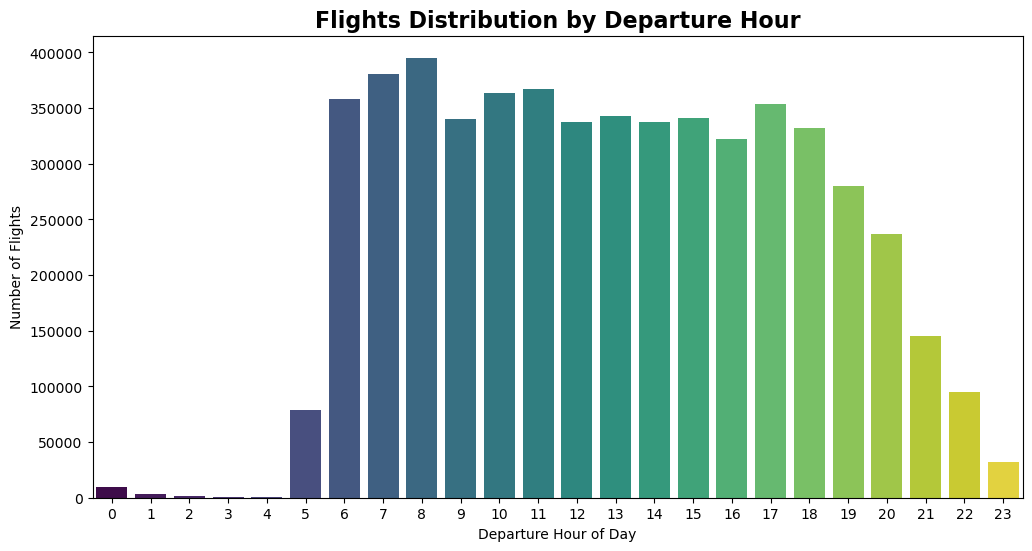

In [73]:
# Count flights per hour
hourly_flights = df_preprocessed_data["DepHour"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(
    x=hourly_flights.index,
    y=hourly_flights.values,
    hue=hourly_flights.index,  
    palette="viridis",
    legend=False               
)
plt.title("Flights Distribution by Departure Hour", fontsize=16, fontweight="bold")
plt.xlabel("Departure Hour of Day")
plt.ylabel("Number of Flights")
plt.show()

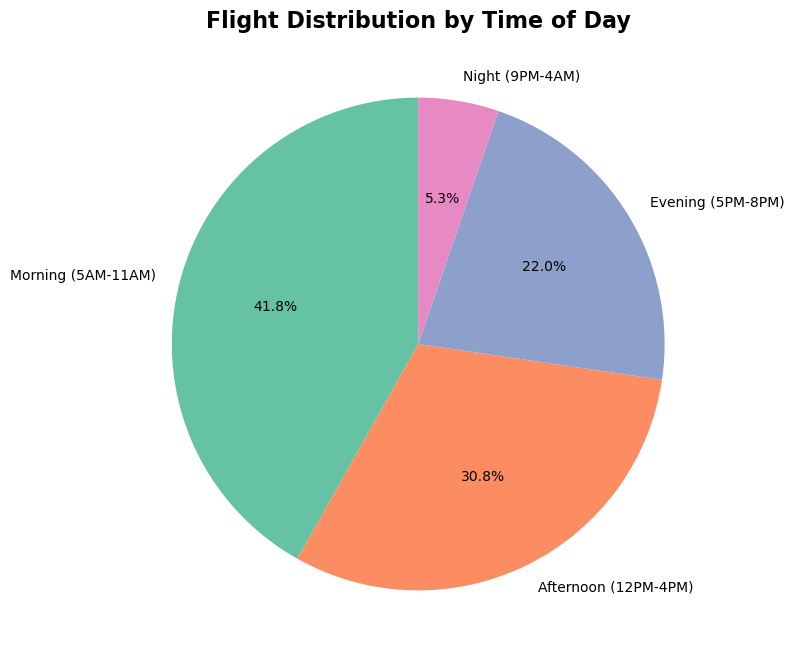

In [74]:
# Categorize into time slots
def time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning (5AM-11AM)"
    elif 12 <= hour < 17:
        return "Afternoon (12PM-4PM)"
    elif 17 <= hour < 21:
        return "Evening (5PM-8PM)"
    else:
        return "Night (9PM-4AM)"

df_preprocessed_data["TimeOfDay"] = df_preprocessed_data["DepHour"].apply(time_of_day)

time_flights = df_preprocessed_data["TimeOfDay"].value_counts().reset_index()
time_flights.columns = ["TimeOfDay", "Flights"]

plt.figure(figsize=(8,8))
plt.pie(
    time_flights["Flights"], 
    labels=time_flights["TimeOfDay"], 
    autopct="%1.1f%%", 
    colors=sns.color_palette("Set2"), 
    startangle=90
)
plt.title("Flight Distribution by Time of Day", fontsize=16, fontweight="bold")
plt.show()

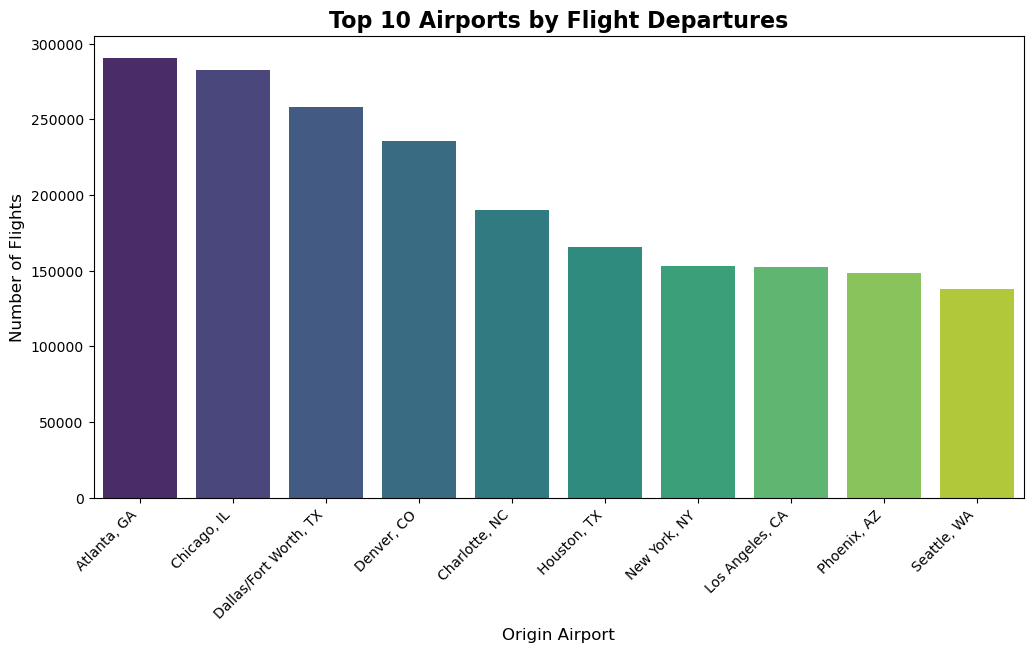

In [75]:
# Top 10 Origin Airports
top_airports = df_preprocessed_data["ORIGIN_CITY"].value_counts().head(10).reset_index()
top_airports.columns = ["Airport", "Flights"]

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_airports, 
    x="Airport", 
    y="Flights", 
    hue="Airport",   
    palette="viridis", 
    legend=False      
)

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.xlabel("Origin Airport", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.title("Top 10 Airports by Flight Departures", fontsize=16, fontweight="bold")
plt.show()

#### **Week 4: Delay Analysis – Airline and Weather**

• Compare delay causes by airline <br>
• Explore carrier delays, weather delays, NAS delays <br>
• Visualize delays by time of day and airport